# Laboratorium 1


### Konfiguracja

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [13]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


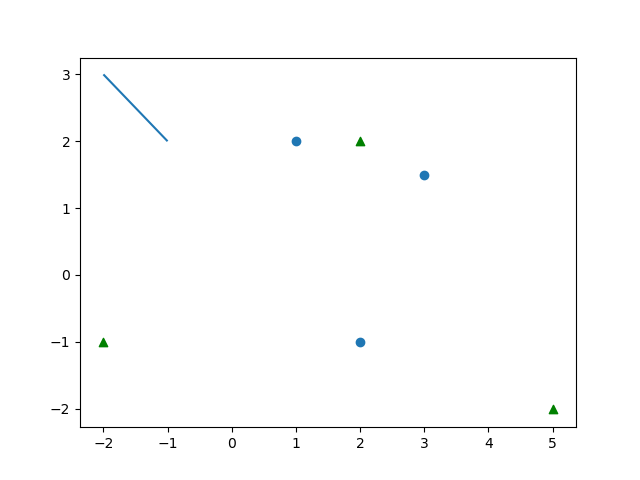

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
%matplotlib notebook



In [5]:
def whichSide(a,b,c):
    return null

In [8]:
signs = [-1, 1]
import random
def generatePoints(nr, valRange):
    points = []
    for i in range(0, nr):
        point = (random.random()*valRange*random.choice(signs), random.random()*valRange*random.choice(signs))
        points.append(point)
    return points


<IPython.core.display.Javascript object>


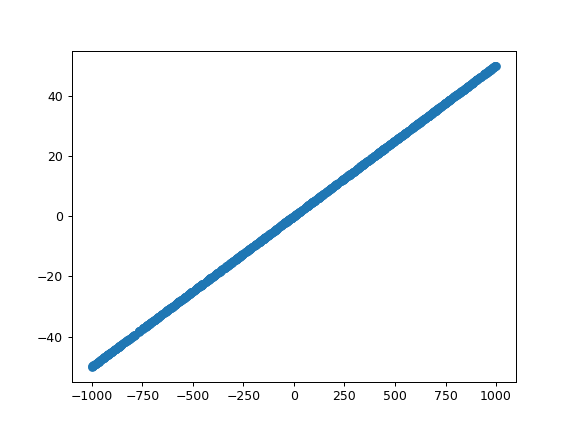

In [14]:
%matplotlib notebook
ran = 10**14
# points = generatePoints(100, ran)
points = setD
plot = Plot([PointsCollection(points)])
plot.draw()

In [10]:
setA = generatePoints(10**5, 1000)
setB = generatePoints(10**5, 10**14)
setC = generateOnCircle(1000, R=100)
setD = setC = generateOnLine(1000)

In [9]:
import math
signs = [-1, 1]

def generateOnCircle(nr, R=1):
    points = []
    for i in range(0, nr):
        t = random.random()
        x = math.cos(math.pi/2*t)*R*random.choice(signs)
        y = math.sin(math.pi/2*t)*R*random.choice(signs)
        
        points.append((x,y))
    return points


In [63]:
import enum
class Orientation(enum.Enum):
    left=0
    right=1
    coll=2
def orientPoints(points, stretch):
    orient = []
    for point in points:
        m = (stretch[1][1]-stretch[0][1])/(stretch[0][1]-stretch[0][0])
        orient.append(Orientation.left)
    return orient

orient = orientPoints([(1,2)], 5)
print(orient)

[<Orientation.left: 0>]


In [6]:
import math
import random
signs = [-1, 1]

def generateOnLine(nr, ran=1000):
    points = []
    a = [-1.0, 0.0]
    b = [1.0, 0.1]
    m = (b[1]-a[1])/(b[0]-a[0])
    c = a[1] - a[0]*m
    for i in range(0, nr):
        x = random.random()*ran*random.choice(signs)
        y = m*x + c
        points.append((x,y))
    return points


[(279.2445198668212, 14.01222599334106), (527.1972438216062, 26.40986219108031), (889.3769447925936, 44.51884723962968), (-483.23531300104116, -24.11176565005206), (-160.8115697356417, -7.990578486782087), (-584.2731516323722, -29.16365758161861), (434.46334582269475, 21.77316729113474), (-995.6717125003901, -49.73358562501951), (244.9502336549697, 12.297511682748487), (-560.9033713215567, -27.995168566077837)]
